In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv('Ruw_stichting_nice.csv', index_col = 0)

In [113]:
data.tail()

,Flow_IC_opnames,IC_opnames_cum,Aanwezig_IC,Cum_IC_died,Cum_IC_hersteld,Flow_IC_died,Flow_IC_hersteld,Flow_IC_from_data,Stock_IC_from_flows,Cum_IC_to_general_hospital,Flow_IC_to_general_hospital,Cum_IC_resterend,Flow_IC_resterend
Datum,,,,,,,,,,,,,
27/03/2020,114.0,1056.0,902.0,101.0,22.0,13.0,0.0,96.0,948.0,46.0,11.0,46.0,11.0
28/03/2020,97.0,1153.0,961.0,117.0,24.0,16.0,2.0,84.0,1032.0,71.0,25.0,71.0,25.0
29/03/2020,83.0,1236.0,1008.0,139.0,24.0,22.0,0.0,65.0,1097.0,89.0,18.0,89.0,18.0
30/03/2020,63.0,1299.0,1019.0,148.0,24.0,9.0,0.0,41.0,1138.0,119.0,30.0,119.0,30.0
31/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Reconstructie aantal op IC van bekende flows

De volgende flows zijn gegeven in de NICE dataset:
1. Aantal opnames
2. Aantal overleden patiënten
3. Aantal volledig herstelde patiënten

Aanname: er missen meerdere flows in het overzicht, mogelijk het aantal patiënten dat uit het IC naar andere delen v/h ziekenhuis zijn overgebracht.

Aanname 2: alle getallen kloppen (zo ongeveer...)

    * Belangrijke opmerking: de flows van doden / herstelden zijn pas opgeteld bij het totaal in de IC op de volgende dag.
    * Daarnaast zitten er nog een aantal fouten in; maar valt binnen marge van +- 2 pers
    * Zo begint het aantal aanwezige patienten op 28/02 met 3, terwijl de cumulatieve flow dan nog 1 is.

We hebben de berekende aantallen op de IC (Aanwezig_IC). We berekenen de stock variabele Flow_ic_from_data op basis van de flows die zijn gegeven op de website van stichting NICE. Van deze flows maken we een stock, simpelweg door de flows over de tijd op te tellen.

Het verschil tussen de zo berekende stock en de gegeven aantallen is de resterende stock. Grootste mogelijke oorzaak lijken mij de patienten die wel van de IC zijn ontslagen, maar nog in het ziekenhuis.

Van het cumulatieve aantal maken we een flow, door telkens het aantal op dag T-1 af te trekken van het aantal op dag T. Dit is de uiteindelijke flow_resterend. 

Wat valt op:
* m.n. laatste dagen groot verschil. 
* Aantal fouten in data (meer mensen op IC dan op basis van flows zou worden verwacht).
* Even afwachten wat er gebeurt als data wordt aangevuld door ICU's. Wellicht dat restverschil deels daardoor wordt verklaard.

In [90]:
data['Flow_IC_from_data'] = data['Flow_IC_opnames'] - data[['Flow_IC_died','Flow_IC_hersteld']].sum(axis=1).shift(1)


data['Stock_IC_from_flows'] = data['Flow_IC_from_data'].cumsum() + 3

In [91]:
data[['Flow_IC_opnames','Flow_IC_died','Flow_IC_hersteld','Flow_IC_from_data','Stock_IC_from_flows','Aanwezig_IC','IC_opnames_cum']]

,Flow_IC_opnames,Flow_IC_died,Flow_IC_hersteld,Flow_IC_from_data,Stock_IC_from_flows,Aanwezig_IC,IC_opnames_cum
Datum,,,,,,,
28/02/2020,1.0,0.0,0.0,NaN,NaN,3.0,1.0
29/02/2020,1.0,0.0,0.0,1.0,4.0,4.0,2.0
01/03/2020,1.0,0.0,0.0,1.0,5.0,5.0,3.0
02/03/2020,0.0,0.0,0.0,0.0,5.0,5.0,3.0
03/03/2020,1.0,0.0,0.0,1.0,6.0,6.0,4.0
04/03/2020,3.0,0.0,1.0,3.0,9.0,9.0,7.0
05/03/2020,1.0,0.0,0.0,0.0,9.0,9.0,8.0
06/03/2020,2.0,0.0,0.0,2.0,11.0,11.0,10.0
07/03/2020,3.0,0.0,0.0,3.0,14.0,13.0,13.0


In [110]:
data['Cum_IC_resterend'] = data['Stock_IC_from_flows'] - data['Aanwezig_IC']

In [111]:
data['Flow_IC_resterend'] = data['Cum_IC_to_general_hospital'] - data['Cum_IC_to_general_hospital'].shift(1) 

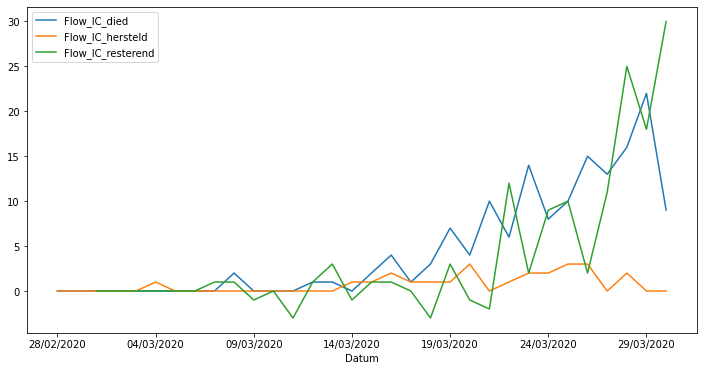

In [112]:
data[['Flow_IC_died','Flow_IC_hersteld','Flow_IC_resterend']].plot(figsize = (12,6))
plt.savefig('Figure_flows.png', dpi = 300)

In [95]:
data.to_csv('Data_verrijkt.csv')